In [5]:
import pyodbc
import cx_Oracle
from cx_Oracle import connect

import pandas as pd

In [6]:
connection = connect('ML/mltst@SPPMLT')
print(connection.version)

19.0.0.0.0


In [7]:
cur = connection.cursor()
cur.execute('select * from LPD_DATA.LPD_WAFER_DETAIL')
rows = cur.fetchall()

In [8]:
print(type(rows))
print(len(rows))
print(rows[:1])

<class 'list'>
391622
[(4, 62924093, -82286, -48360, 17714, 51640, 95444.62, -2.61026, '.124', 'LPD', None)]


In [9]:
print(cur.description)

[('LPD_ID', <cx_Oracle.DbType DB_TYPE_NUMBER>, 127, None, 0, -127, 0), ('WAFER_NUMBER', <cx_Oracle.DbType DB_TYPE_NUMBER>, 39, None, 38, 0, 0), ('RAW_X_COORDINATE', <cx_Oracle.DbType DB_TYPE_NUMBER>, 127, None, 0, -127, 1), ('RAW_Y_COORDINATE', <cx_Oracle.DbType DB_TYPE_NUMBER>, 127, None, 0, -127, 1), ('X_COORDINATE', <cx_Oracle.DbType DB_TYPE_NUMBER>, 127, None, 0, -127, 1), ('Y_COORDINATE', <cx_Oracle.DbType DB_TYPE_NUMBER>, 127, None, 0, -127, 1), ('R_VALUE', <cx_Oracle.DbType DB_TYPE_NUMBER>, 127, None, 0, -127, 1), ('THETA', <cx_Oracle.DbType DB_TYPE_NUMBER>, 127, None, 0, -127, 1), ('DEFECT_SIZE', <cx_Oracle.DbType DB_TYPE_VARCHAR>, 100, 100, None, None, 0), ('DEFECT_TYPE', <cx_Oracle.DbType DB_TYPE_VARCHAR>, 100, 100, None, None, 1), ('ML_DEFECT', <cx_Oracle.DbType DB_TYPE_VARCHAR>, 500, 500, None, None, 1)]


In [10]:
col_names = []
for i in range(0, len(cur.description)):
    col_names.append(cur.description[i][0])
col_names

['LPD_ID',
 'WAFER_NUMBER',
 'RAW_X_COORDINATE',
 'RAW_Y_COORDINATE',
 'X_COORDINATE',
 'Y_COORDINATE',
 'R_VALUE',
 'THETA',
 'DEFECT_SIZE',
 'DEFECT_TYPE',
 'ML_DEFECT']

In [11]:
df = pd.DataFrame(rows, columns=col_names)

In [12]:
df.shape

(391622, 11)

In [13]:
df.head(2)

,LPD_ID,WAFER_NUMBER,RAW_X_COORDINATE,RAW_Y_COORDINATE,X_COORDINATE,Y_COORDINATE,R_VALUE,THETA,DEFECT_SIZE,DEFECT_TYPE,ML_DEFECT
0,4,62924093,-82286,-48360,17714,51640,95444.62,-2.61026,.124,LPD,None
1,10,62924743,40682,23310,140682,123310,46886.90,0.52032,.153,LPD,None


In [14]:
df['WAFER_NUMBER'].nunique()

2282

In [15]:
df.sort_values(by=['WAFER_NUMBER','LPD_ID'], ascending = [True, True],inplace=True)

In [16]:
df.head(2)

,LPD_ID,WAFER_NUMBER,RAW_X_COORDINATE,RAW_Y_COORDINATE,X_COORDINATE,Y_COORDINATE,R_VALUE,THETA,DEFECT_SIZE,DEFECT_TYPE,ML_DEFECT
106396,24,55825127,9900,-86310,109900,13690,86875.92,-1.45659,.106,LPD,None
106397,24,55825127,-14916,-75690,85084,24310,77145.73,-1.76537,.132,LPD,None


In [17]:
df['DEFECT_TYPE'].value_counts()

LPD        257991
LPDN       132491
Area          811
L             225
LC             95
Scratch         9
Name: DEFECT_TYPE, dtype: int64

In [18]:
df['LPD_ID'].value_counts()

25     19560
32     18963
23     17140
26     16528
99     15085
       ...  
42        42
41        32
36        31
1         26
125       23
Name: LPD_ID, Length: 111, dtype: int64

In [19]:
#pivot = pd.pivot_table(data=df, index='WAFER_NUMBER', values = 'WAFER_NUMBER')
wafer = df['WAFER_NUMBER'].value_counts()
wafer = wafer.to_frame().reset_index()
wafer = wafer.rename(columns={'index':'WAFER_NUMBER','WAFER_NUMBER':'COUNT'})
wafer

,WAFER_NUMBER,COUNT
0,55825949,1645
1,55825963,1596
2,55825779,1592
3,55826029,1511
4,55825783,1501
...,...,...
2277,63115903,1
2278,62390147,1
2279,63115901,1
2280,62390143,1


(array([1.569e+03, 5.900e+01, 6.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 3.000e+01, 6.600e+01, 6.100e+01, 5.600e+01, 8.700e+01,
        1.520e+02, 9.600e+01, 2.300e+01, 1.000e+01, 7.000e+00, 3.000e+00,
        3.000e+00, 6.000e+00, 6.000e+00, 6.000e+00, 4.000e+00, 6.000e+00,
        1.000e+00, 3.000e+00, 4.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([1.00000000e+00, 4.66666667e+01, 9.23333333e+01, 1.38000000e+02,
        1.83666667e+02, 2.29333333e+02, 2.75000000e+02, 3.20666667e+02,
        3.66333333e+02, 4.12000000e+02, 4.57666667e+02, 5.03333333e+02,
        5.49000000e+02, 5.94666667e+02, 6.40333333e+02, 6.86000000e+02,
        7.31666667e+02, 7.77333333e+02, 8.23000000e+02, 8.68666667e+02,
        9.14333333e+02, 9.60000000e+02, 1.00566667e+03, 1.05133333e+03,
        1.09700000e+03, 1.14266667e+03, 1.18833333e+03, 1.23400000e+03,
        1.27966667e+03, 1.32533333e+03, 1.37100000

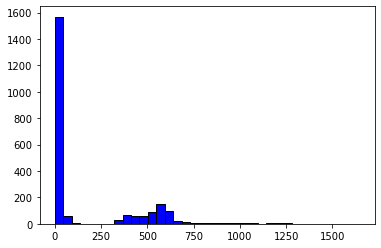

In [20]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(wafer['COUNT'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

c:\Users\akumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Flights')

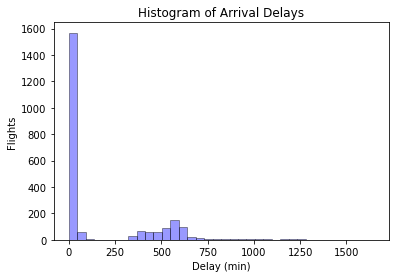

In [21]:
# seaborn histogram
sns.distplot(wafer['COUNT'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

In [22]:
wafer['COUNT'].describe()

count    2282.000000
mean      171.613497
std       275.343071
min         1.000000
25%         4.000000
50%        12.000000
75%       399.000000
max      1645.000000
Name: COUNT, dtype: float64

In [44]:
df['DEFECT_SIZE'].value_counts()

.100    7858
.098    7058
.111    7049
.113    6725
.116    6146
        ... 
.214       1
.204       1
.233       1
.235       1
.193       1
Name: DEFECT_SIZE, Length: 185, dtype: int64

In [56]:
l = df['DEFECT_TYPE']

l1 = []
 
# taking an counter
count = 0
 
# traversing the array
for item in l:
    if item not in l1:
        count += 1
        l1.append(item)
 
# printing the output
print("No of unique items are:", count)

No of unique items are: 1


In [42]:
df.describe()

,LPD_ID,WAFER_NUMBER,RAW_X_COORDINATE,RAW_Y_COORDINATE,X_COORDINATE,Y_COORDINATE,R_VALUE,THETA
count,183308.000000,1.833080e+05,183308.000000,183308.000000,183308.000000,183308.000000,183308.000000,183308.000000
mean,26.896153,5.589301e+07,-464.460640,-1062.493110,99535.539360,98937.506890,51866.372787,-0.052070
std,3.973995,6.619555e+05,38671.771003,39544.054665,38671.771003,39544.054665,19247.011525,1.807721
min,1.000000,5.582513e+07,-96549.000000,-96600.000000,3451.000000,3400.000000,334.820000,-3.141430
25%,24.000000,5.582562e+07,-30624.000000,-34898.000000,69376.000000,65102.000000,40305.420000,-1.647537
50%,27.000000,5.582595e+07,-554.000000,-1478.000000,99446.000000,98522.000000,51760.540000,-0.076845
75%,30.000000,5.582615e+07,29581.000000,32962.000000,129581.000000,132962.000000,65842.147500,1.512680
max,33.000000,6.296342e+07,96730.000000,97184.000000,196730.000000,197184.000000,99726.250000,3.141590


In [86]:
df[df['WAFER_NUMBER']==55825949]

,LPD_ID,WAFER_NUMBER,RAW_X_COORDINATE,RAW_Y_COORDINATE,X_COORDINATE,Y_COORDINATE,R_VALUE,THETA,DEFECT_SIZE,DEFECT_TYPE
34093,32,55825949,-9346,-76065,90654,23935,76637.01,-1.69305,.108,None
34094,32,55825949,-22414,-75225,77586,24775,78493.24,-1.86038,.123,None
34095,32,55825949,-3168,-73545,96832,26455,73613.20,-1.61385,.127,None
34096,32,55825949,-20513,-72435,79487,27565,75283.55,-1.84676,.101,None
34097,32,55825949,-10138,-71415,89862,28585,72131.00,-1.71181,.119,None
...,...,...,...,...,...,...,...,...,...,...
178803,32,55825949,-73260,-23625,26740,76375,76975.11,-2.82964,.133,None
178816,32,55825949,-82922,-21285,17078,78715,85610.22,-2.89033,.099,None
178817,32,55825949,-36973,-12585,63027,87415,39056.18,-2.81351,.132,None
178818,32,55825949,-23826,4440,76174,104440,24236.17,2.95735,.134,None


In [87]:
df[df['WAFER_NUMBER']==62389743]

,LPD_ID,WAFER_NUMBER,RAW_X_COORDINATE,RAW_Y_COORDINATE,X_COORDINATE,Y_COORDINATE,R_VALUE,THETA,DEFECT_SIZE,DEFECT_TYPE
467,14,62389743,-41709,80558,58291,180558,90715.11,2.04854,.150,None


In [85]:
df['WAFER_NUMBER'].value_counts(0)

55825949    1645
55825963    1596
55825779    1592
55826029    1511
55825783    1501
            ... 
62389745       1
62390645       1
62924047       1
62390649       1
62389743       1
Name: WAFER_NUMBER, Length: 742, dtype: int64

gray <function <lambda> at 0x00000258810A4A60>


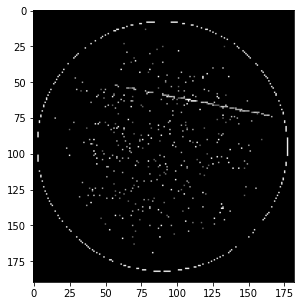

In [14]:
import cv2
import numpy as np
import imageio as iio
from matplotlib import pyplot as plt
pic = iio.imread(r'c:\users\akumar\Downloads\image.png') 
pic = pic[20:210, 48:230, :]
gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114])  
print("gray",gray)
gray = gray(pic) 
plt.figure( figsize = (5,5))
plt.imshow(gray, cmap = plt.get_cmap(name = 'gray')) 
plt.show()
rho = 1
theta = np.pi/180
#lines = cv2.HoughLines(gray, rho, theta, 0, 0, 0, np.pi) 

In [12]:
x = [90654.99378204345703, 424.4607162475586, 665.4505157470703, 665.1176452636719]

y = [709.4012403488159, 253.38330745697021, 519.5582628250122, 519.5164632797241]

In [13]:
from matplotlib import pyplot as plt
im = plt.imread(p_transform_path)
implot = plt.imshow(im)
for p,q in zip(x,y):
    x_cord = p # try this change (p and q are already the coordinates)
    y_cord = q
    plt.scatter([x_cord], [y_cord])
plt.show()

NameError: name 'p_transform_path' is not defined

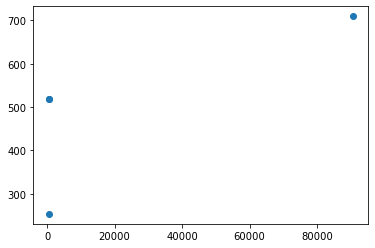

In [14]:
import numpy as np
import matplotlib.pyplot as plt


#x = np.random.rand(N)
#y = np.random.rand(N)

plt.scatter(x, y)
plt.show()